In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,Price,Beds,Baths,Sqft
0,"$675,000",4bed,2.5bath,"2,951sqft"
1,"$410,000",4bed,2bath,"1,920sqft"
2,"$235,000",3bed,1bath,"1,021sqft"
3,"$219,900",2bed,1.5bath,"1,116sqft"
4,"$390,000",3bed,3bath,"1,806sqft"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   42 non-null     object
 1   Beds    42 non-null     object
 2   Baths   42 non-null     object
 3   Sqft    42 non-null     object
dtypes: object(4)
memory usage: 1.4+ KB


In [5]:
df.describe()

,Price,Beds,Baths,Sqft
count,42,42,42,42
unique,40,7,6,40
top,"$415,000",3bed,2bath,"1,124sqft"
freq,2,21,24,2


In [6]:
#Cleaning data by removing $ from housing.csv dataset
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

df['Price'] = df['Price'].apply(clean_currency).astype('float')


In [7]:
#Cleaning data by removing the word bed from housing.csv dataset
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bed', '').replace(',', ''))
    return(x)

df['Beds'] = df['Beds'].apply(clean_currency).astype('float')

In [8]:
#Cleaning data by removing the word baths from housing.csv dataset
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bath', '').replace(',', ''))
    return(x)

df['Baths'] = df['Baths'].apply(clean_currency).astype('float')

In [9]:
#Cleaning data by removing the word sqft from housing.csv dataset
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('sqft', '').replace(',', ''))
    return(x)

df['Sqft'] = df['Sqft'].apply(clean_currency).astype('float')

In [10]:
df.head()

,Price,Beds,Baths,Sqft
0,675000.000,4.000,2.500,2951.000
1,410000.000,4.000,2.000,1920.000
2,235000.000,3.000,1.000,1021.000
3,219900.000,2.000,1.500,1116.000
4,390000.000,3.000,3.000,1806.000


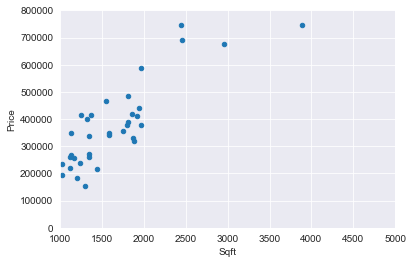

In [11]:
#Home prices based off sqft
var = 'Sqft'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000),xlim=(1000,5000));


 mu = 438085.00 and sigma = 342890.03



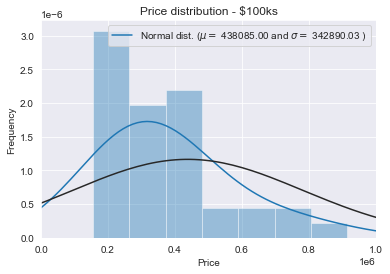

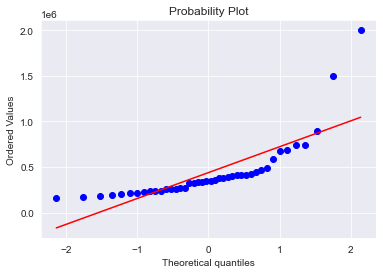

In [12]:
#Whats the frequency of houses in different price ranges
sns.distplot(df['Price'] , fit=norm);

#  the fitted parameters used by the function
(mu, sigma) = norm.fit(df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution - $100ks')
plt.xlim(0,1000000)

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)
plt.show()

<AxesSubplot:>

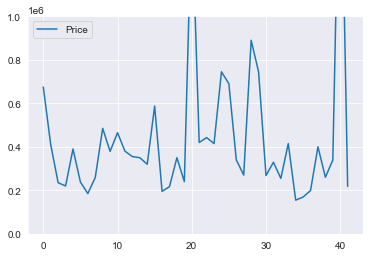

In [13]:
#Plot Line Graph of prices of homes
#Y = Price up to 2 million
df.plot.line(y='Price', use_index=True, ylim=(0,1000000))

In [14]:
X = df[['Beds','Baths','Sqft']]

In [15]:
y = df['Price']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
print(lm.intercept_)

-416004.553452042


In [22]:
lm.coef_

array([ 53529.80062806, 134606.72611144,    215.95018013])

In [23]:
predictions = lm.predict(X_test)

In [24]:
predictions

array([ 481952.44712825,  355215.5354369 ,  293669.73410051,
        112802.42034123, 1149040.62934737,  133965.53799375,
        308570.29652932,  371338.70580236,  256526.30311855,
        202996.50249049,  280759.97239337,  -71520.09630009,
        -82749.50566673,  255662.50239804,  -65257.54107639,
        541796.49106723,  469427.33668085])

In [25]:
y_test

1     410000.000
26    340000.000
20   1500000.000
16    195000.000
29    745000.000
3     219900.000
33    415000.000
38    260000.000
18    350000.000
30    268000.000
34    154900.000
35    169000.000
41    218000.000
7     259000.000
36    199000.000
24    745000.000
21    420000.000
Name: Price, dtype: float64

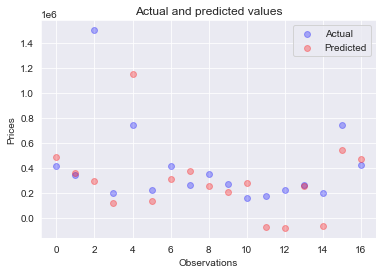

In [26]:
#scatter plot that shows atual prices of homes and predicted prices of home and how they compare
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, predictions.size), y=predictions, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Prices')
plt.legend()
plt.show()